## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [147]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [148]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [149]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [150]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [151]:
print(train.duplicated().any())
print(test.duplicated().any())
print(train.isna().values.any())
print(test.isna().values.any())

False
False
False
False


В данных нет дублей и пропусков

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [152]:
train.describe().round(2)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00
mean,-0.54,-0.73,0.68,-0.47,-0.85,-0.49,0.06,-0.06,-0.13,17.41
std,0.48,0.32,0.51,0.54,0.23,0.51,0.30,0.28,0.40,8.98
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.93,1.00
25%,-0.98,-0.99,0.80,-0.94,-1.00,-0.81,-0.02,-0.14,-0.49,8.00
50%,-0.88,-0.95,0.93,-0.88,-0.99,-0.71,0.18,0.00,-0.16,19.00
75%,-0.11,-0.47,0.97,-0.02,-0.76,-0.51,0.25,0.11,0.16,26.00
max,1.00,1.00,1.00,1.00,1.00,1.00,0.48,1.00,1.00,30.00


Для меня показалось интересным, что angle(Y,gravityMean) - это единственный показатель, у которого максимум не равен 1, что на самом деле логично, учитывая суть данного показателя.

In [ ]:
test.describe().round(2)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00,2947.00
mean,-0.56,-0.74,0.70,-0.46,-0.88,-0.51,0.07,-0.05,-0.15,12.99
std,0.44,0.28,0.50,0.52,0.16,0.51,0.32,0.24,0.39,6.95
min,-1.00,-1.00,-0.76,-0.95,-1.00,-0.98,-0.91,-0.95,-1.00,2.00
25%,-0.98,-0.99,0.84,-0.93,-1.00,-0.83,0.02,-0.10,-0.50,9.00
50%,-0.86,-0.91,0.93,-0.85,-0.98,-0.73,0.18,-0.01,-0.20,12.00
75%,-0.15,-0.49,0.97,-0.01,-0.80,-0.55,0.26,0.09,0.14,18.00
max,0.48,0.12,1.00,0.79,0.05,0.83,1.00,0.97,0.96,24.00


### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [155]:
train.count = train.groupby('Activity')['subject'].count()
int((min(train.count) / max(train.count)) * 100)

70

In [156]:
test.count = test.groupby('Activity')['subject'].count()
int((min(test.count) / max(test.count)) * 100)

78

Разница составляет 70% и 78% в train и test соответственно, значит данные сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [157]:
train.corr()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
tBodyAccMag-mean(),1.000000,0.899080,0.369962,0.959827,0.697832,-0.370849,0.495561,0.426283,0.379796,-0.073652
tBodyGyroJerk-mad()-X,0.899080,1.000000,0.380118,0.879900,0.507939,-0.382246,0.478567,0.380967,0.266002,-0.110321
tGravityAcc-min()-X,0.369962,0.380118,1.000000,0.380404,0.239088,-0.988663,0.797116,0.667415,-0.261676,-0.042371
tBodyAcc-max()-X,0.959827,0.879900,0.380404,1.000000,0.613383,-0.384192,0.480229,0.405023,0.335708,-0.055633
"fBodyAcc-bandsEnergy()-1,8.2",0.697832,0.507939,0.239088,0.613383,1.000000,-0.213318,0.363170,0.423927,0.260316,-0.037000
"angle(X,gravityMean)",-0.370849,-0.382246,-0.988663,-0.384192,-0.213318,1.000000,-0.783848,-0.643655,0.265523,0.026137
"angle(Y,gravityMean)",0.495561,0.478567,0.797116,0.480229,0.363170,-0.783848,1.000000,0.594885,-0.046213,-0.009829
"angle(Z,gravityMean)",0.426283,0.380967,0.667415,0.405023,0.423927,-0.643655,0.594885,1.000000,-0.183815,-0.098712
fBodyAcc-skewness()-X,0.379796,0.266002,-0.261676,0.335708,0.260316,0.265523,-0.046213,-0.183815,1.000000,0.019742
subject,-0.073652,-0.110321,-0.042371,-0.055633,-0.037000,0.026137,-0.009829,-0.098712,0.019742,1.000000


In [ ]:
test.corr()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
tBodyAccMag-mean(),1.000000,0.934773,0.407084,0.965114,0.767875,-0.400871,0.439051,0.425011,0.365670,-0.057359
tBodyGyroJerk-mad()-X,0.934773,1.000000,0.393773,0.898628,0.625414,-0.387274,0.423288,0.368411,0.278765,-0.079811
tGravityAcc-min()-X,0.407084,0.393773,1.000000,0.386764,0.301643,-0.989043,0.697006,0.633881,-0.237864,0.004927
tBodyAcc-max()-X,0.965114,0.898628,0.386764,1.000000,0.707129,-0.384454,0.410477,0.398008,0.338543,-0.071786
"fBodyAcc-bandsEnergy()-1,8.2",0.767875,0.625414,0.301643,0.707129,1.000000,-0.279783,0.327473,0.446245,0.293881,-0.090817
"angle(X,gravityMean)",-0.400871,-0.387274,-0.989043,-0.384454,-0.279783,1.000000,-0.668108,-0.615114,0.235208,0.003138
"angle(Y,gravityMean)",0.439051,0.423288,0.697006,0.410477,0.327473,-0.668108,1.000000,0.425454,-0.087006,-0.047553
"angle(Z,gravityMean)",0.425011,0.368411,0.633881,0.398008,0.446245,-0.615114,0.425454,1.000000,-0.208121,0.055885
fBodyAcc-skewness()-X,0.365670,0.278765,-0.237864,0.338543,0.293881,0.235208,-0.087006,-0.208121,1.000000,0.015103
subject,-0.057359,-0.079811,0.004927,-0.071786,-0.090817,0.003138,-0.047553,0.055885,0.015103,1.000000


В целом значения получились довольно ожидаемые, как например тот факт, что у параметра subject одинаково низкая корреляция со всеми другими параметрами. Меня немного удивило то, что у angle(X,gravityMean) показатели корреляции ещё ниже, хотя казалось бы, в отличие от того же subject здесь должна была наблюдаться какая-то закономерность.

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

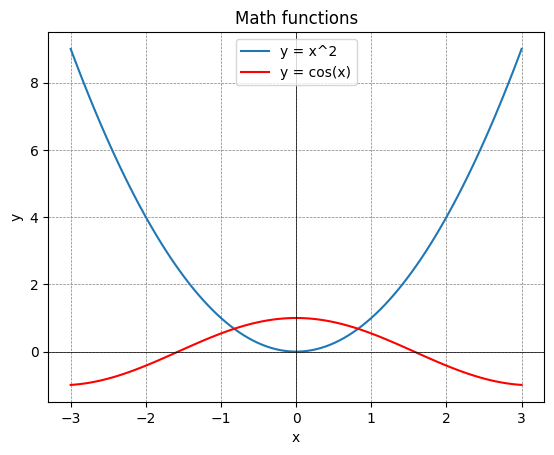

In [22]:
x = np.linspace(-3,3,100)
plt.plot(x, x**2, label='y = x^2')
plt.plot(x, np.cos(x), label='y = cos(x)', color='red')

plt.title('Math functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

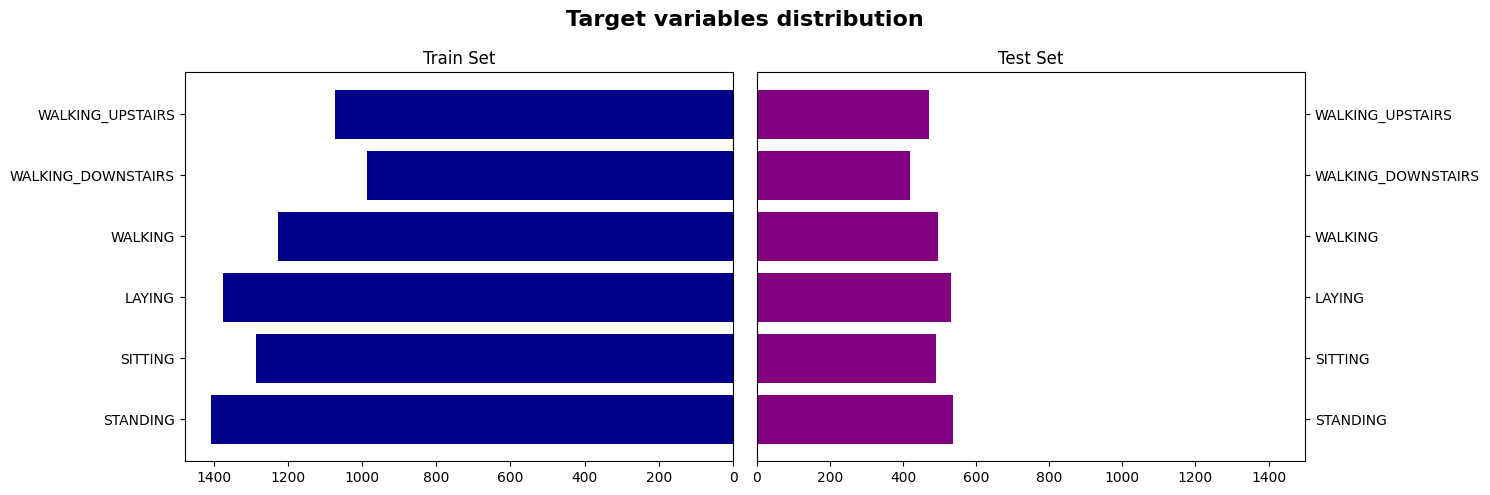

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ntrain = train.groupby('Activity')['subject'].count().tolist()
ntest = test.groupby('Activity')['subject'].count().tolist()
trainact = list(train['Activity'].unique())
testact = list(test['Activity'].unique())
fig.suptitle('Target variables distribution', fontsize=16, weight='bold')

ax1.barh(trainact, ntrain, color='darkblue')
ax1.invert_xaxis()
ax1.set_title('Train Set')

ax2.barh(testact, ntest, color='purple')
ax2.set_title('Test Set')
plt.xlim(0,1500)
ax2.tick_params(axis='y', right=True, left=False, labelright=True, labelleft=False)

plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

Text(0.5, 1.0, 'Correlation heatmap for train')

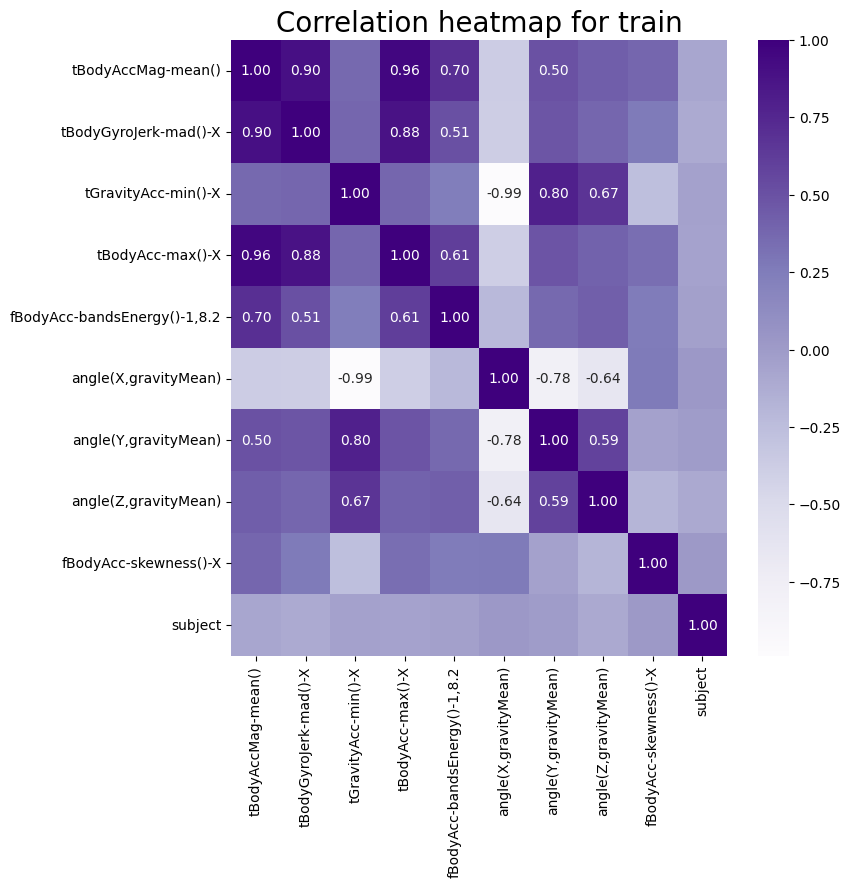

In [159]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(train.corr(), cmap="Purples", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

ax.set_title('Correlation heatmap for train', fontsize=20)

Text(0.5, 1.0, 'Correlation heatmap for test')

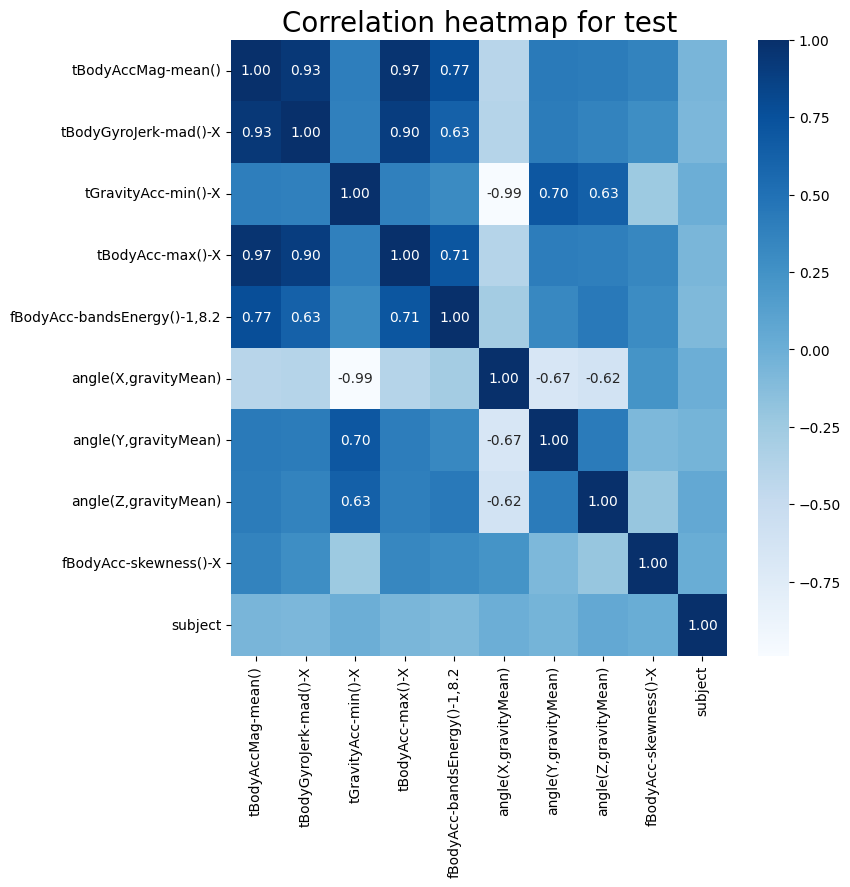

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(test.corr(), cmap="Blues", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

ax.set_title('Correlation heatmap for test', fontsize=20)

Исключить стоит subject, поскольку он отражает номер участника, так что корреляция с данным показателем нам ни о чем не говорит.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

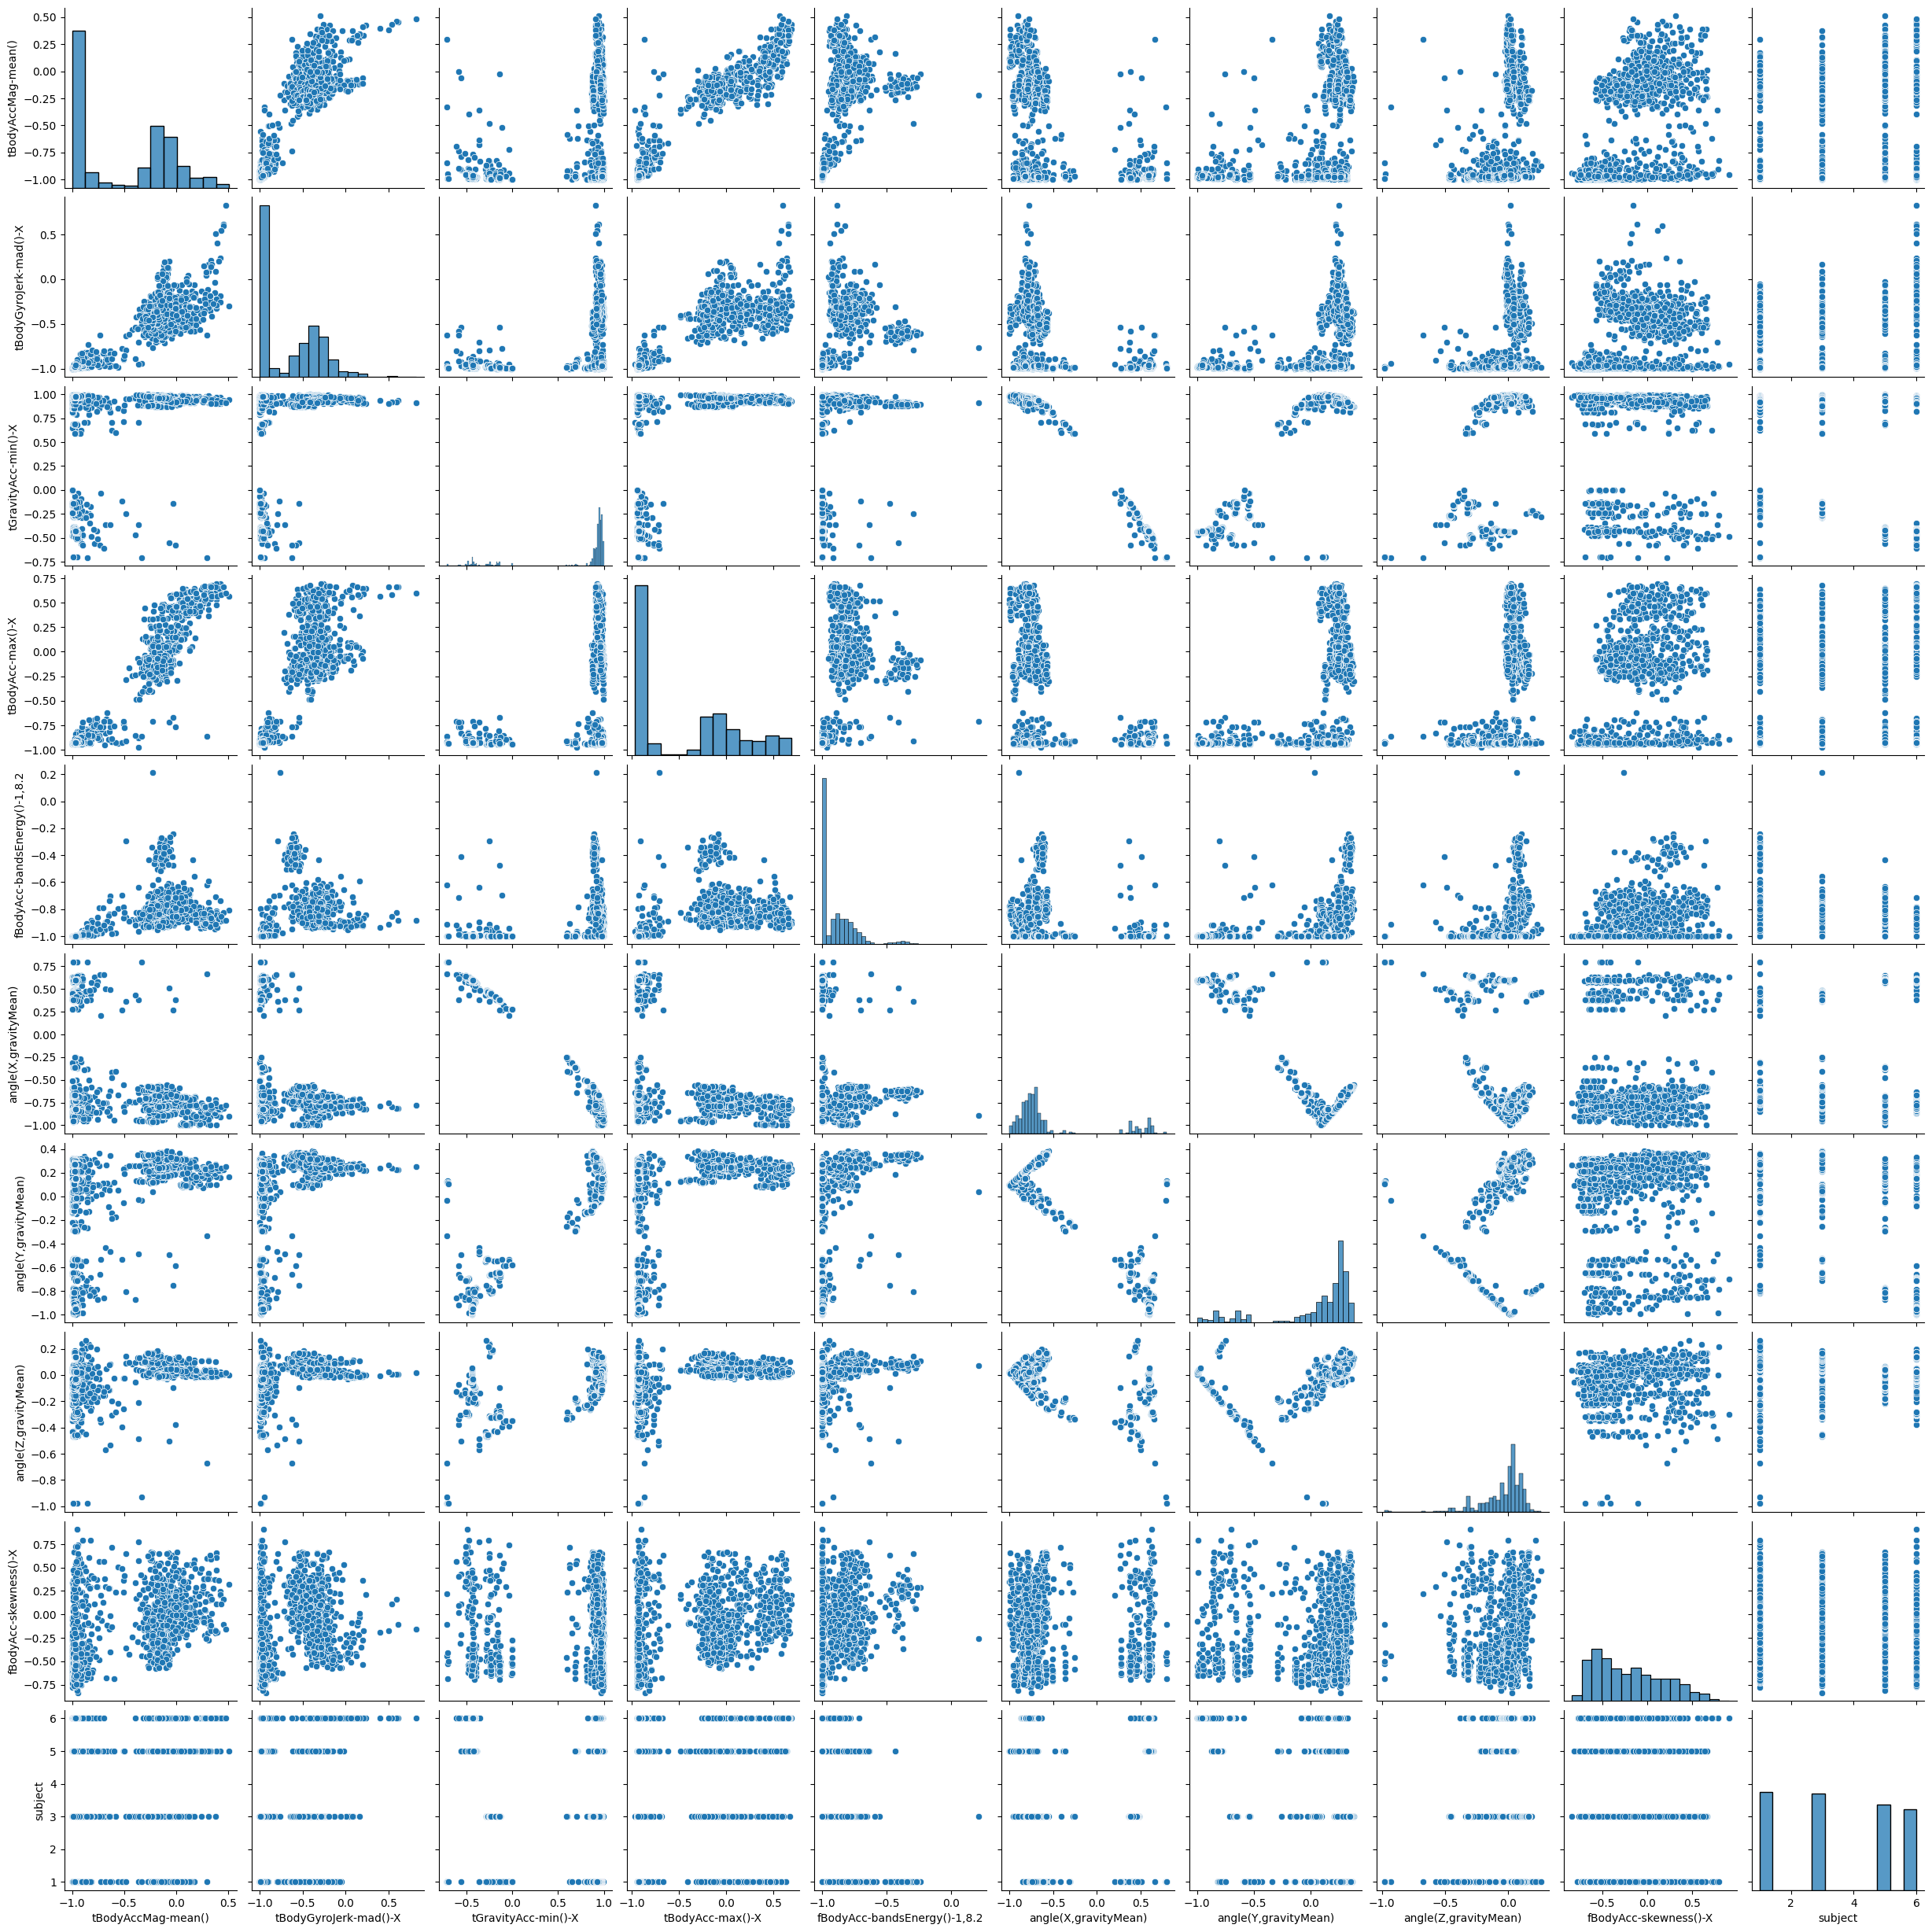

In [ ]:
sns.pairplot(train)

Конечно анализировать такое количество графиков - не самое приятное занятие, но я обратила внимание на то, как отличаются точечные графики параметров с большой корреляцией от тех, у которых корреляция низкая или отрицательная. Графики параметров с большой корреляцией выглядят намного более "кучными".

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

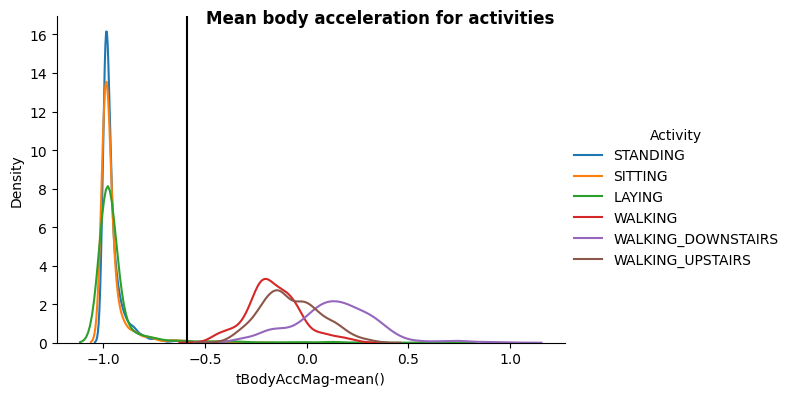

In [160]:
facet = sns.FacetGrid(data=train, hue="Activity", legend_out=True, height=4, aspect=1.5)
facet = facet.map(sns.kdeplot, "tBodyAccMag-mean()")
facet.add_legend(fontsize=10)
facet.fig.suptitle('Mean body acceleration for activities', weight='bold')
plt.axvline(-0.59, c='black');

In [120]:
static = train[(train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')]
dynamic = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]

(static[static['tBodyAccMag-mean()'] < -0.59]['subject'].count() + dynamic[dynamic['tBodyAccMag-mean()'] > -0.59]['subject'].count()) / (static['subject'].count() + dynamic['subject'].count())

0.9900707290533188

Вертикальная линия, расположенная примерно на x = -0.59, хорошо делит активности на 2 категории с точностью в 99%, поскольку такие занятия как "стоять", "сидеть" и "лежать" не требуют особой активности от человека, тогда как хотьба, которая по сути объединяет собой оставшиеся 3 занятия, требует движения от человека.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

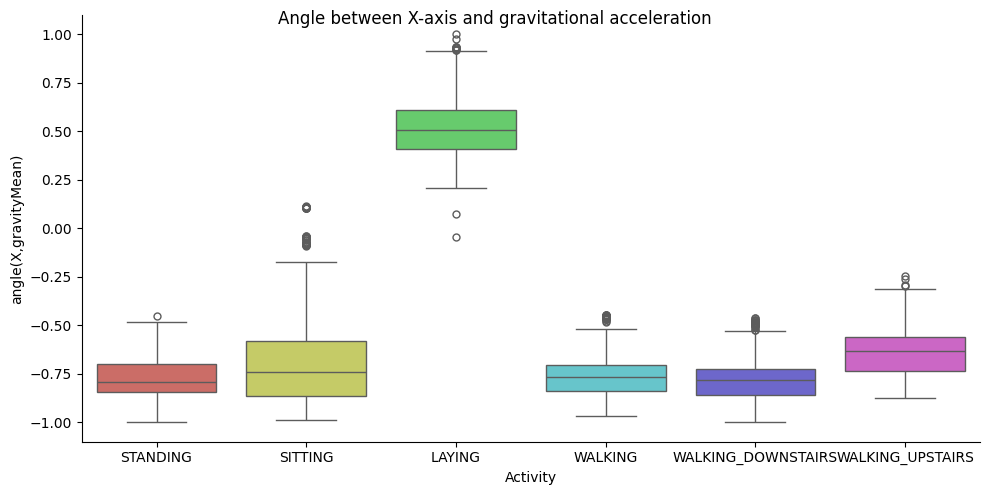

In [31]:
box = sns.catplot(x="Activity", y="angle(X,gravityMean)", data=train, kind="box", palette='hls', legend = False, height=5, aspect=2)
box.fig.suptitle('Angle between X-axis and gravitational acceleration')
plt.show()

Сильнее всего выделяется конечно активность "лежать", поскольку это единственное занятие из представленных, которым люди занимаются в горизонтальном положении. Из остальных активностей занятия "хотьба вверх" и "хотьба вниз" немного выделяются, поскольку тоже включают в себя движения по вертикали.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

<Axes: xlabel='Activity', ylabel='tBodyAcc-max()-X'>

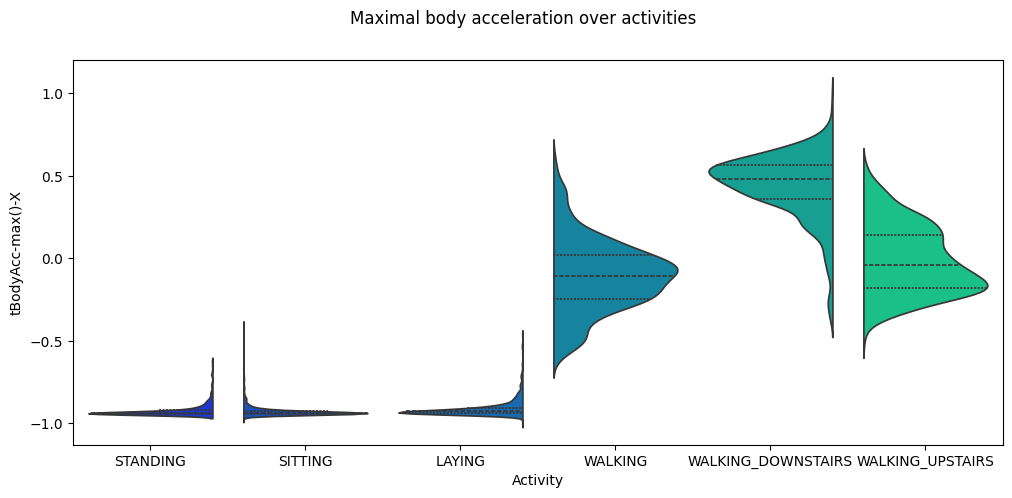

In [32]:
fig = plt.figure(figsize = (12,5))
fig.suptitle('Maximal body acceleration over activities')
sns.violinplot(data=train, x="Activity", y="tBodyAcc-max()-X", split=True, inner="quart", palette='winter')

На данном графике выделяется активность "хотьба по лестнице вниз", потому что при хотьбе вниз человек ускоряется также благодаря гравитации, что увеличивает максимальное ускорение.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

Text(0.5, 1.0, 'Static activities')

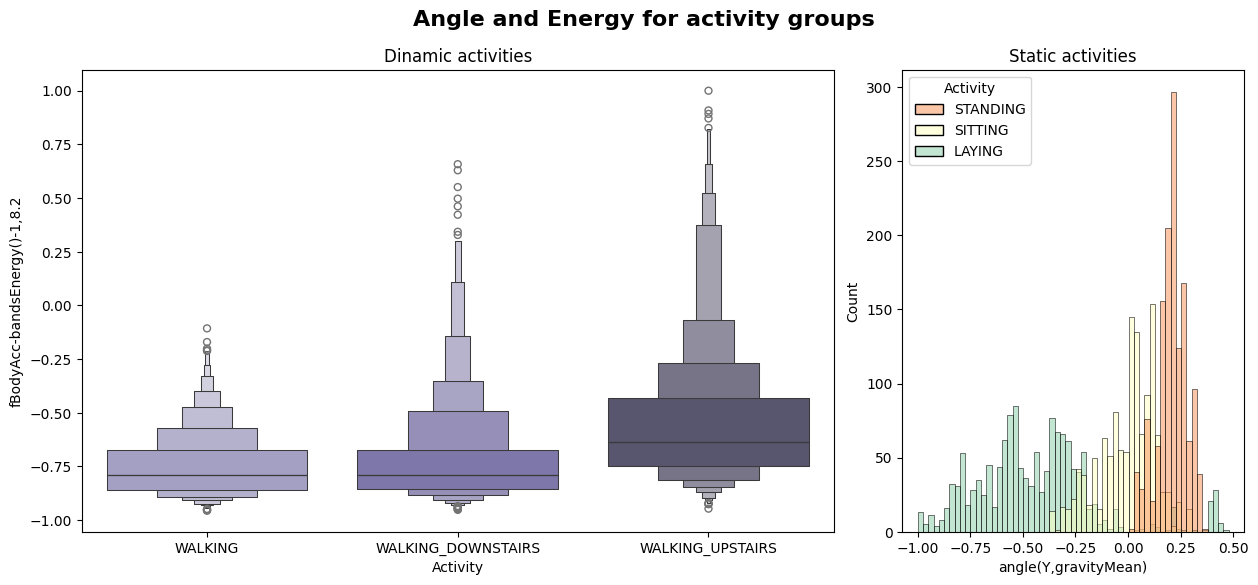

In [161]:
static = train[(train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')]
dynamic = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]

fig = plt.figure(figsize = (15,6))
fig.suptitle('Angle and Energy for activity groups', fontsize=16, weight='bold')

plt.subplot(1,3,(1,2))
sns.boxenplot(data=dynamic, x = 'Activity', y = 'fBodyAcc-bandsEnergy()-1,8.2', palette='Purples_d')
plt.title('Dinamic activities')

plt.subplot(1,3,3)
sns.histplot(data=static, x = 'angle(Y,gravityMean)', hue='Activity', palette='Spectral', binwidth=0.025)
plt.title('Static activities')


### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

Text(0.5, 1.0, 'Angle between Y-axis and gravity acceleration over activities')

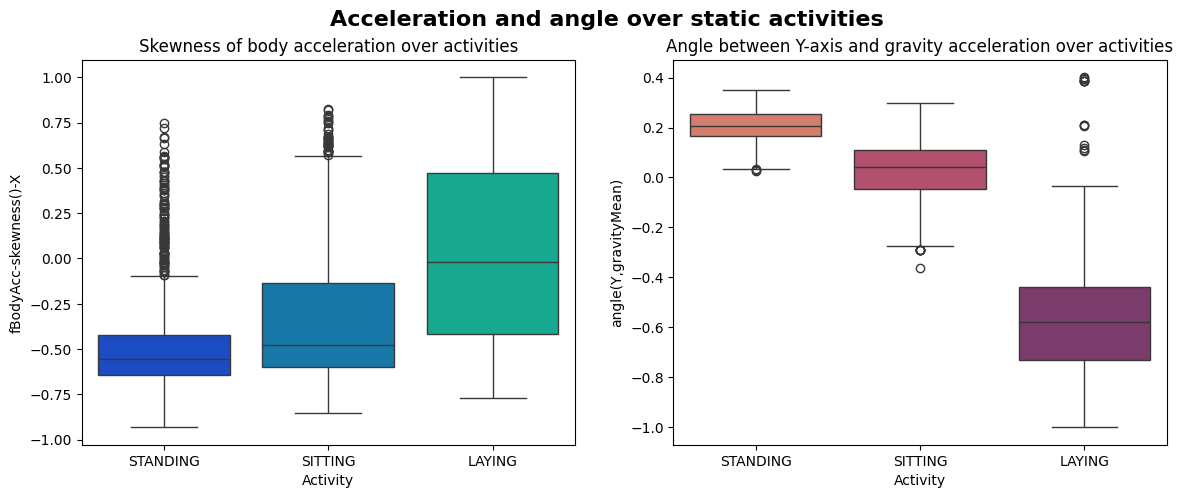

In [64]:
fig = plt.figure(figsize = (14,5))
fig.suptitle('Acceleration and angle over static activities', fontsize=16, weight='bold')

plt.subplot(1,2,1)
sns.boxplot(data=static, x = 'Activity', y = 'fBodyAcc-skewness()-X', palette = 'winter')
plt.title('Skewness of body acceleration over activities')

staticpart = static[static['fBodyAcc-skewness()-X'] < -0.376]
plt.subplot(1,2,2)
sns.boxplot(data=staticpart, x = 'Activity', y = 'angle(Y,gravityMean)', palette = 'flare')
plt.title('Angle between Y-axis and gravity acceleration over activities')



На правом графике можно заметить, что занятие "sitting" - единственное занятие, большинство значений которого находятся около 0.

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

Text(0.5, 1.0, 'Maximal gravity acceleration over activities')

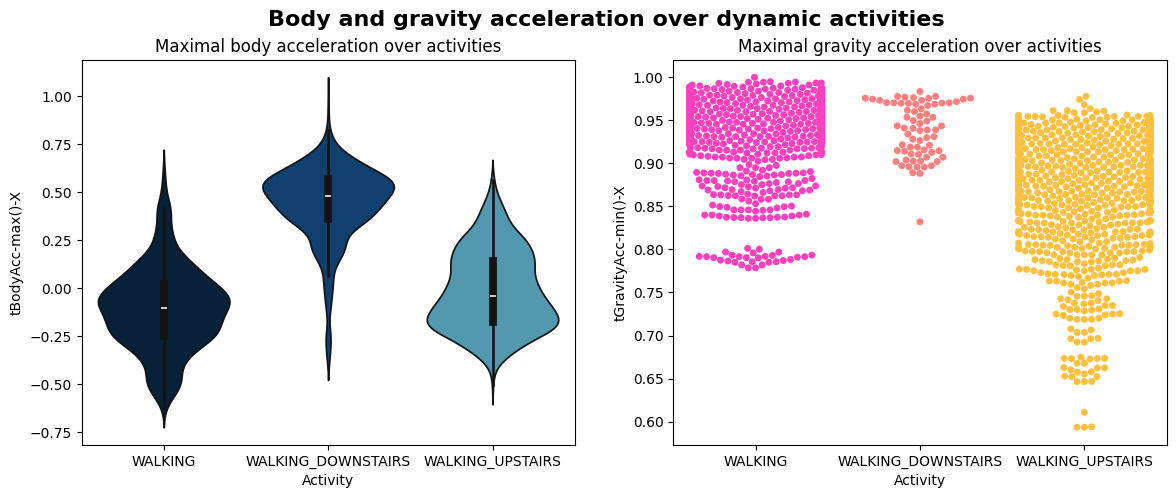

In [121]:
fig = plt.figure(figsize = (14,5))
fig.suptitle('Body and gravity acceleration over dynamic activities', fontsize=16, weight='bold')

plt.subplot(1,2,1)
sns.violinplot(data=dynamic, x="Activity", y="tBodyAcc-max()-X", palette='ocean')
plt.title('Maximal body acceleration over activities')

dynamicpart = dynamic[dynamic['tBodyAcc-max()-X'] < 0.157]

plt.subplot(1,2,2)
sns.swarmplot(data=dynamicpart, x = 'Activity', y = 'tGravityAcc-min()-X', palette = 'spring')
plt.title('Maximal gravity acceleration over activities')

Здесь можно заметить, что значения занятия "walking" в основном достаточно сильно кучкуются на правом графике в значениях выше 0.9.

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [83]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 34s, sys: 279 ms, total: 6min 34s
Wall time: 4min 3s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [162]:
import plotly.express as px

px.scatter(data_frame=df_2_comp, x='x', y='y', color='Activity')

На данном графике можно очень отчетливо отделить линиями 3 категории активностей.
(и в целом график очень красивый получился)

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [163]:
px.scatter_3d(data_frame=df_3_comp, x='x', y='y', z='z', color='Activity')

Здесь прослеживается достаточно четкое разделение на различные занятия. Большинство из них хоть и пересекается с другими, но все равно у каждого прослеживается конкретное "место", в котором находится большинство его точек.

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [164]:
def predict(df: pd.DataFrame):
    pred = []
    for i, line in df.iterrows():
      if line['tBodyAccMag-mean()'] < -0.59:
        if line['angle(X,gravityMean)'] > 0:
          pred.append('LAYING')
        elif 0.18 < line['angle(Y,gravityMean)'] < 0.4:
          pred.append('STANDING')
        else:
          pred.append('SITTING')
      else:
        if line['tBodyAcc-max()-X'] > 0.25:
          pred.append('WALKING_DOWNSTAIRS')
        elif line['angle(X,gravityMean)'] > -0.7 or line['tBodyAcc-max()-X'] < 0.157 and line['tGravityAcc-min()-X'] < 0.825:
          pred.append('WALKING_UPSTAIRS')
        else:
          pred.append('WALKING')
    return pred


def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [165]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8023667029379761
Accuracy on test set => 0.7587376993552766


__Место для мема и/или фидбэка__

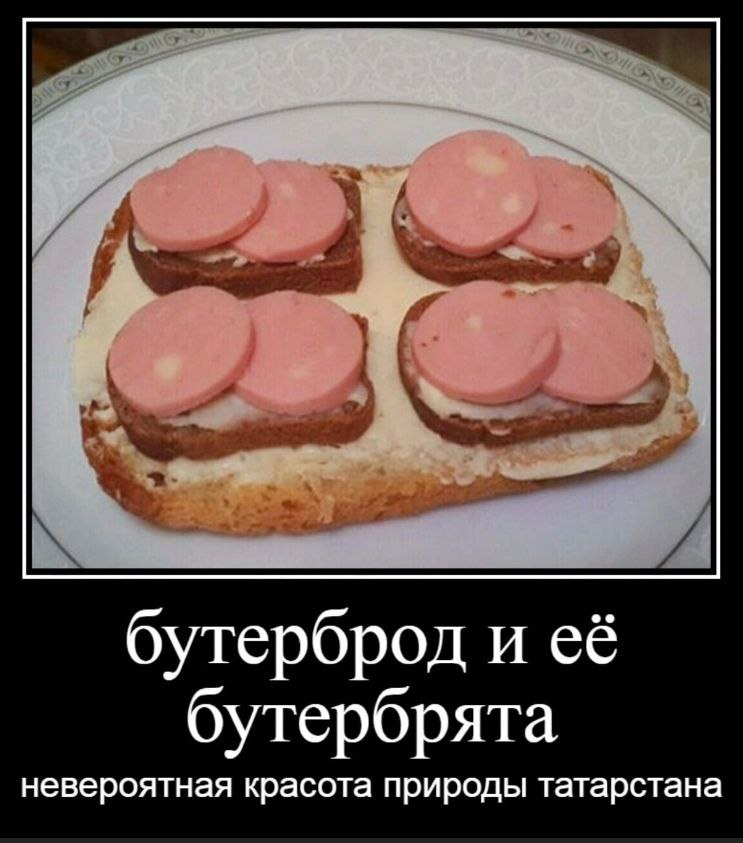